In [2]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from src.model_builder import build_model


In [6]:
DATA_DIR = "../ml/data/PlantVillage"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

class_names = train_ds.class_names
print(f"Classes: {class_names}")


Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [7]:
def preprocess(image, label):
    image = preprocess_input(image)
    return image, label

train_ds = train_ds.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)



Found 20638 files belonging to 15 classes.
Using 16511 files for training.


2025-11-20 03:04:49.736337: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


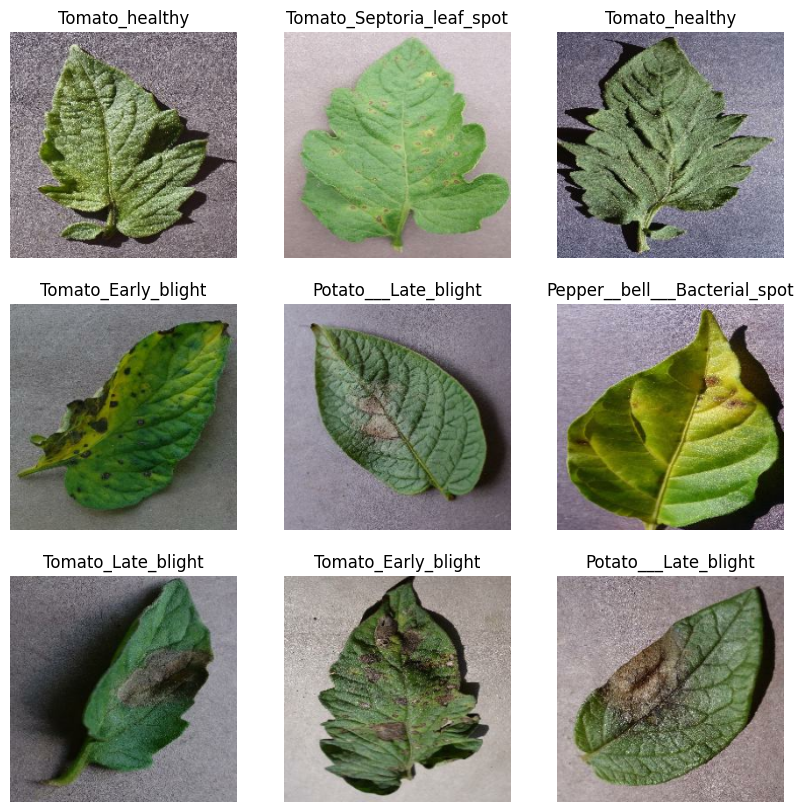

In [9]:
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

plt.figure(figsize=(10, 10))
for images, labels in raw_train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")  # uint8 image for matplotlib
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


2025-11-20 03:05:34.978270: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-11-20 03:05:35.018765: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


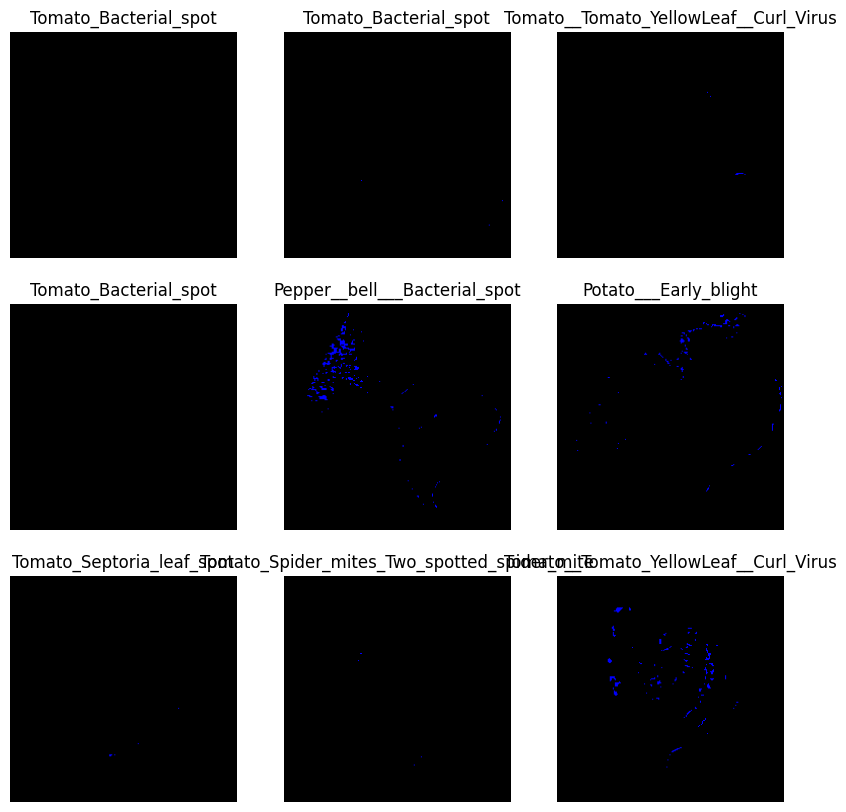

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [12]:
model = build_model(input_shape=(224, 224, 3), num_classes=len(class_names))
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,277,199 (8.69 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
EPOCHS = 20
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("../model/plant_disease_model.h5", monitor="val_accuracy", save_best_only=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)


Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.5170 - loss: 1.5827

516/516 ━━━━━━━━━━━━━━━━━━━━ 183s 351ms/step - accuracy: 0.6806 - loss: 1.0584 - val_accuracy: 0.8401 - val_loss: 0.5377
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.8282 - loss: 0.5616

516/516 ━━━━━━━━━━━━━━━━━━━━ 197s 382ms/step - accuracy: 0.8408 - loss: 0.5182 - val_accuracy: 0.8784 - val_loss: 0.4054
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.8740 - loss: 0.4209

516/516 ━━━━━━━━━━━━━━━━━━━━ 201s 390ms/step - accuracy: 0.8743 - loss: 0.4053 - val_accuracy: 0.8912 - val_loss: 0.3509
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.8862 - loss: 0.3638

516/516 ━━━━━━━━━━━━━━━━━━━━ 204s 395ms/step - accuracy: 0.8877 - loss: 0.3560 - val_accuracy: 0.9007 - val_loss: 0.3193
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.8978 - loss: 0.3348

516/516 ━━━━━━━━━━━━━━━━━━━━ 247s 479ms/step - accuracy: 0.8987 - loss: 0.3227 - val_accuracy: 0.9048 - val_loss: 0.3000
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8997 - loss: 0.3091

516/516 ━━━━━━━━━━━━━━━━━━━━ 249s 483ms/step - accuracy: 0.9000 - loss: 0.3062 - val_accuracy: 0.9111 - val_loss: 0.2809
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9064 - loss: 0.2895

516/516 ━━━━━━━━━━━━━━━━━━━━ 243s 472ms/step - accuracy: 0.9068 - loss: 0.2849 - val_accuracy: 0.9116 - val_loss: 0.2722
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.9102 - loss: 0.2773

516/516 ━━━━━━━━━━━━━━━━━━━━ 247s 478ms/step - accuracy: 0.9101 - loss: 0.2724 - val_accuracy: 0.9150 - val_loss: 0.2620
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.9138 - loss: 0.2660

516/516 ━━━━━━━━━━━━━━━━━━━━ 253s 491ms/step - accuracy: 0.9134 - loss: 0.2619 - val_accuracy: 0.9179 - val_loss: 0.2526
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.9203 - loss: 0.2547

516/516 ━━━━━━━━━━━━━━━━━━━━ 253s 490ms/step - accuracy: 0.9191 - loss: 0.2530 - val_accuracy: 0.9183 - val_loss: 0.2499
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9218 - loss: 0.2386

516/516 ━━━━━━━━━━━━━━━━━━━━ 235s 455ms/step - accuracy: 0.9208 - loss: 0.2423 - val_accuracy: 0.9200 - val_loss: 0.2428
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 232s 450ms/step - accuracy: 0.9205 - loss: 0.2432 - val_accuracy: 0.9188 - val_loss: 0.2415
Epoch 13/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.9287 - loss: 0.2320

516/516 ━━━━━━━━━━━━━━━━━━━━ 230s 445ms/step - accuracy: 0.9247 - loss: 0.2334 - val_accuracy: 0.9215 - val_loss: 0.2386
Epoch 14/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 245s 476ms/step - accuracy: 0.9251 - loss: 0.2299 - val_accuracy: 0.9210 - val_loss: 0.2317
Epoch 15/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.9288 - loss: 0.2239

516/516 ━━━━━━━━━━━━━━━━━━━━ 241s 466ms/step - accuracy: 0.9289 - loss: 0.2222 - val_accuracy: 0.9229 - val_loss: 0.2335
Epoch 16/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 288s 558ms/step - accuracy: 0.9303 - loss: 0.2151 - val_accuracy: 0.9215 - val_loss: 0.2361
Epoch 17/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.9296 - loss: 0.2134

516/516 ━━━━━━━━━━━━━━━━━━━━ 296s 574ms/step - accuracy: 0.9306 - loss: 0.2136 - val_accuracy: 0.9244 - val_loss: 0.2271
Epoch 18/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.9313 - loss: 0.2122

516/516 ━━━━━━━━━━━━━━━━━━━━ 299s 580ms/step - accuracy: 0.9331 - loss: 0.2076 - val_accuracy: 0.9263 - val_loss: 0.2232
Epoch 19/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 305s 592ms/step - accuracy: 0.9309 - loss: 0.2062 - val_accuracy: 0.9244 - val_loss: 0.2244
Epoch 20/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.9338 - loss: 0.2032

516/516 ━━━━━━━━━━━━━━━━━━━━ 287s 557ms/step - accuracy: 0.9342 - loss: 0.2045 - val_accuracy: 0.9268 - val_loss: 0.2187


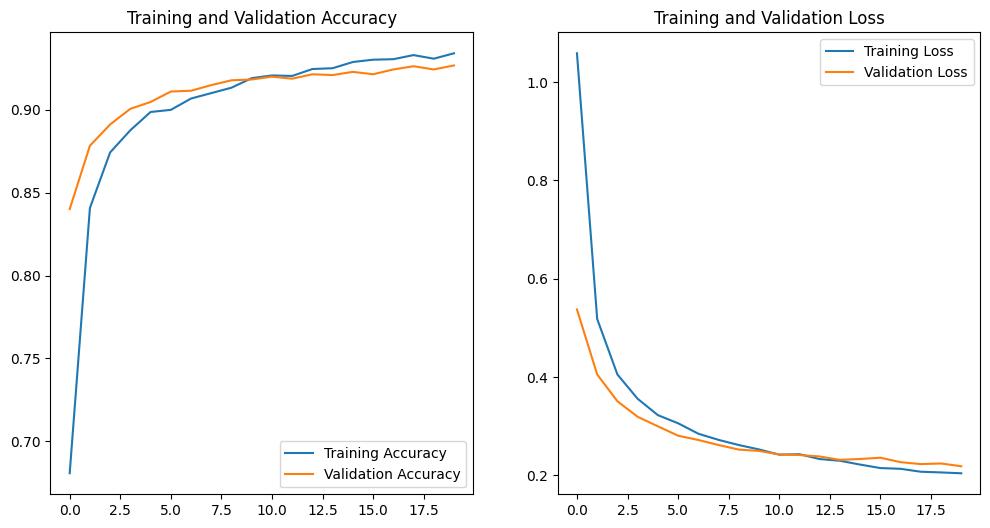

In [14]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()


In [3]:
import tensorflow as tf
import os

model_h5 = tf.keras.models.load_model("model/plant_disease_model.h5")
model_keras = tf.keras.models.load_model("model/plant_disease_model.keras")

print("H5 model loaded:", model_h5.summary())
print("KERAS model loaded:", model_keras.summary())



/Users/abdullahalhossain/Desktop/System Design/TF/venv/lib/python3.13/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,277,201 (8.69 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

H5 model loaded: None


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,296,416 (8.76 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 19,217 (75.07 KB)

KERAS model loaded: None


In [5]:
import numpy as np

dummy = np.random.rand(1, 224, 224, 3).astype("float32")

print("H5\n", model_h5.predict(dummy))
print("KERAS\n", model_keras.predict(dummy))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
H5
 [[5.46577974e-12 5.17727621e-08 5.18165854e-17 3.79001945e-14
  2.98313045e-12 8.25940358e-12 8.11371581e-10 6.69230005e-10
  2.96547054e-08 9.04328317e-06 6.36619056e-12 1.08055636e-08
  4.66486405e-10 3.60835693e-03 9.96382475e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
KERAS
 [[3.8847330e-13 1.4448437e-08 9.7530829e-19 7.6710251e-15 9.4634316e-13
  1.2939420e-12 2.4325056e-10 7.9325907e-11 3.9238590e-09 6.3723969e-06
  7.9919936e-13 1.4567417e-09 3.4806619e-11 1.8558587e-03 9.9813771e-01]]
